In [1]:
'''
Loading X dataset from the United States Census Bureau.
Data includes Estimates of the total population as of July 1, 2024 

Objective
- Get for all US States the:
  -- mean
  -- median
  -- min
  -- max
  -- standard deviation (std)
- Create a visualizations for:
  -- Total state populations
  -- State resident pop. 18 or older, number
  -- State resident pop. 18 or older, percentage
'''

# Imports
import pandas as pd
import matplotlib.pyplot as plt  # Stretch goal

# Load the census dataset
# Source: https://www2.census.gov/programs-surveys/popest/tables/2020-2024/state/detail/SCPRC-EST2024-18+POP.xlsx
dataset_uri = 'SCPRC-EST2024-18+POP.xlsx'
df = pd.read_excel(dataset_uri, engine='openpyxl')

# Preview data
print(df.head(n=10))


  table with row headers in column A and column headers in rows 3 through 5. (leading dots indicate sub-parts)  \
0  Estimates of the Total Resident Population and...                                                             
1                                    Geographic Area                                                             
2                                                NaN                                                             
3                                      United States                                                             
4                                          Northeast                                                             
5                                            Midwest                                                             
6                                              South                                                             
7                                               West                                    

In [2]:
# Skip down to where the data starts.  Include both rows for the columns names
df = pd.read_excel(dataset_uri, engine='openpyxl', skiprows=2, header=[0, 1])
# print(df)

# Combine stacked columns titles. Replace newline chars
df.columns = [' '.join(cols).strip().replace('\n ', ' ').replace('\n', ' ') for cols in df.columns]
# print(df.columns)

# Strip out ' Unnamed:...' from column names
df.columns = [col.split(' Unnamed:')[0] for col in df.columns]
# print(df.columns)

# Remove leading '.' for state names found in data source
df['Geographic Area'] = df['Geographic Area'].str.lstrip('.')

# print(df.columns)

In [3]:
# Truncate metadata rows after 'Wyoming', checking if value exists first
last_valid_state = 'Wyoming'
if (df['Geographic Area'] == last_valid_state ).any():
    # Find the index.
    last_valid_index = df[df['Geographic Area'] == last_valid_state].index[-1]
    
    # Keep rows up to the last valid index
    df = df.iloc[:last_valid_index + 1]
else:
    print(f"Index for value '{last_valid_state}' not found in 'Geographic Area' column.")
    last_valid_index = None

df = df.iloc[:last_valid_index + 1]
print(df.tail(10))

   Geographic Area  Total Resident Population  \
46    South Dakota                   924669.0   
47       Tennessee                  7227750.0   
48           Texas                 31290831.0   
49            Utah                  3503613.0   
50         Vermont                   648493.0   
51        Virginia                  8811195.0   
52      Washington                  7958180.0   
53   West Virginia                  1769979.0   
54       Wisconsin                  5960975.0   
55         Wyoming                   587618.0   

    Resident Population Age 18 Years and Older Number  \
46                                           703963.0   
47                                          5645233.0   
48                                         23625608.0   
49                                          2569984.0   
50                                           535519.0   
51                                          6927764.0   
52                                          6303143.0   
53  

In [4]:
# Extract US total and major regions to separate dataframe
# Follow up: Which states are part of which region?
areas = ['United States', 'Northeast', 'Midwest', 'South', 'West']
regions_df = df[df['Geographic Area'].isin(areas)]
print(regions_df)

# Get the regions out of the states list
areas.append('United States')
df = df[~df['Geographic Area'].isin(areas)]
print(df)

  Geographic Area  Total Resident Population  \
0   United States                340110988.0   
1       Northeast                 57832935.0   
2         Midwest                 69596584.0   
3           South                132665693.0   
4            West                 80015776.0   

   Resident Population Age 18 Years and Older Number  \
0                                        266978268.0   
1                                         46278295.0   
2                                         54403741.0   
3                                        103348958.0   
4                                         62947274.0   

   Resident Population Age 18 Years and Older Percent  
0                                               78.5   
1                                               80.0   
2                                               78.2   
3                                               77.9   
4                                               78.7   
         Geographic Area  Total Reside

       Total Resident Population  \
count                         51   
mean                     6668843   
std                      7602106   
min                       587618   
25%                      1885799   
50%                      4588372   
75%                      7770282   
max                     39431263   

       Resident Population Age 18 Years and Older Number  \
count                                                 51   
mean                                             5234868   
std                                              5951704   
min                                               459626   
25%                                              1471384   
50%                                              3531346   
75%                                              6148676   
max                                             31012711   

       Resident Population Age 18 Years and Older Percent  
count                                                 51   
mean          

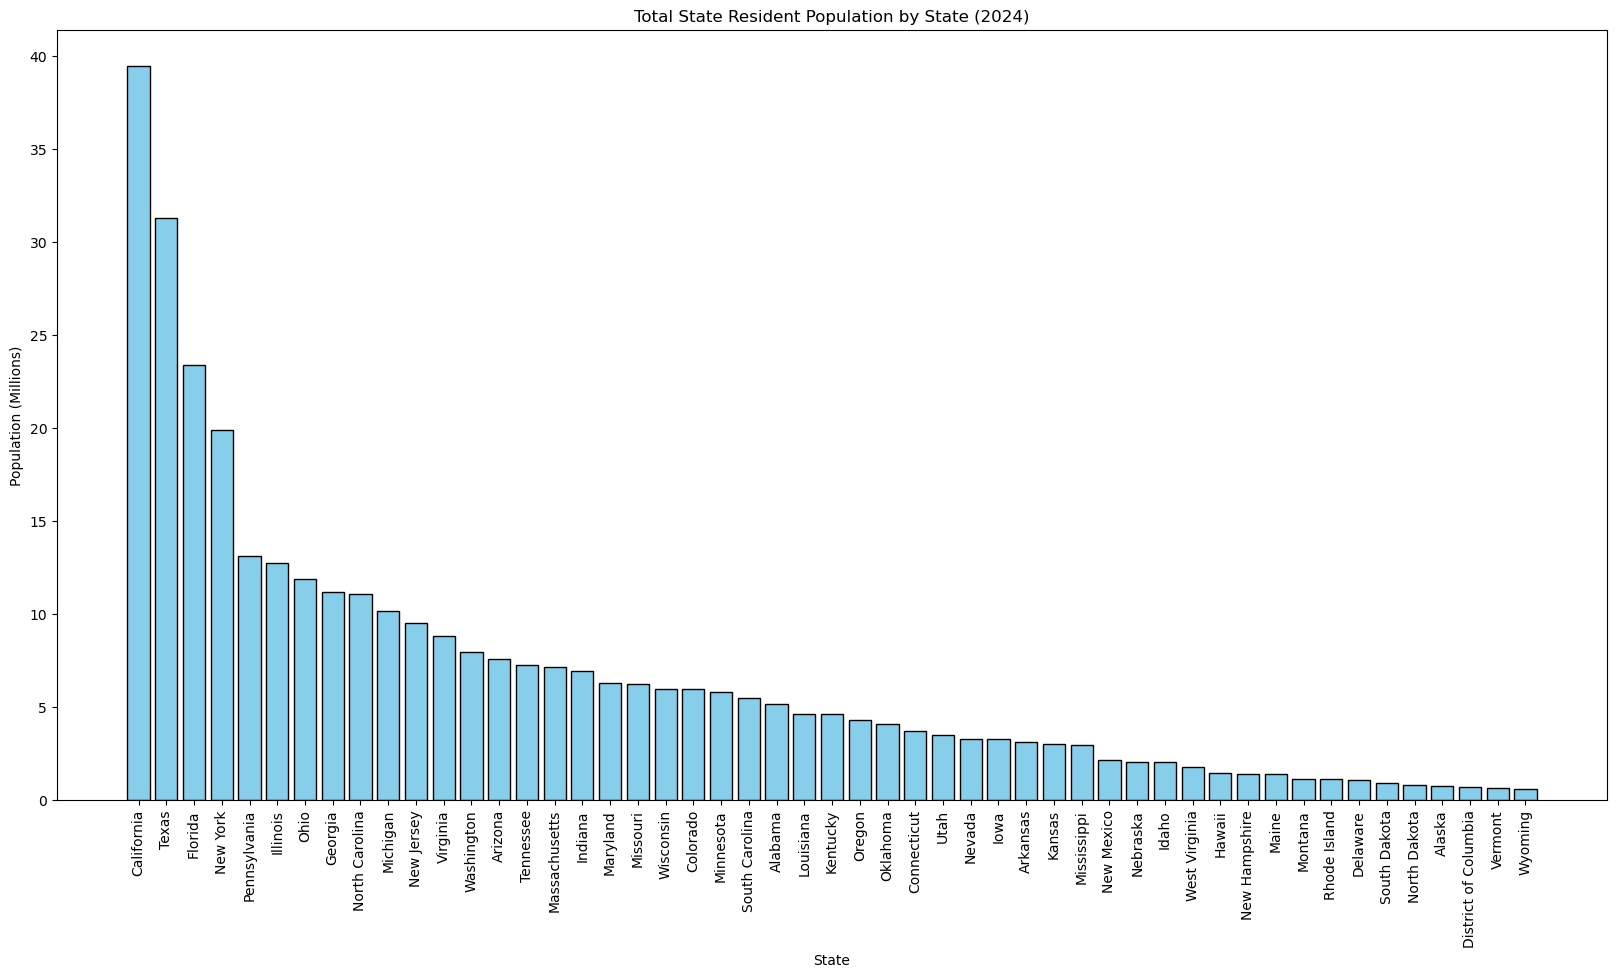

In [5]:
# Now the analysis: States

pd.options.display.float_format = '{:.0f}'.format

# Basic statistical analysis: mean, median, std, min/max 25/50/75 quartiles.
print( df.describe() )

# Scale down the populations numbers for better visualization
df['Population in Millions'] = df['Total Resident Population'] / 1000000

# Sort high to low
df_sorted = df.sort_values(by='Population in Millions', ascending=False)

# Set the plot figure size
plt.figure(figsize=(20, 10))

# Create the bar graph
plt.bar(
    df_sorted['Geographic Area'],
    df_sorted['Population in Millions'],
    color='skyblue',
    edgecolor='black',
)

# Rotate state names for readability
plt.xticks(rotation=90, fontsize=10)

# Labels and Title
plt.title('Total State Resident Population by State (2024)')
plt.ylabel('Population (Millions)')
plt.xlabel('State')

# Plot the population data
plt.show()

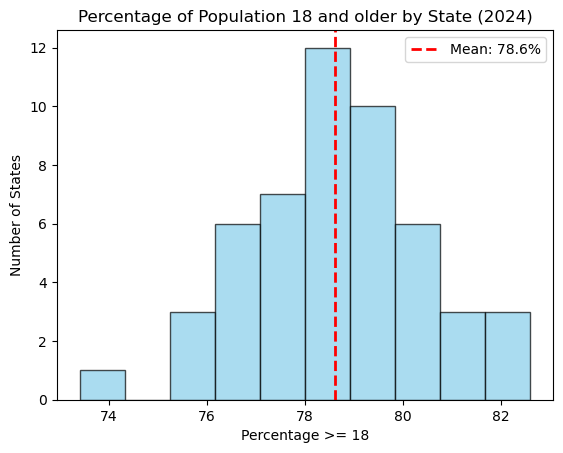

In [6]:
# Analysis: Percentage 18 and older, by State

# Create the histogram
plt.hist(
    df['Resident Population Age 18 Years and Older Percent'],
    bins=10,
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)
    
# Labels and Title
plt.title('Percentage of Population 18 and older by State (2024)')
plt.ylabel('Number of States')
plt.xlabel('Percentage >= 18')

mean_value = df['Resident Population Age 18 Years and Older Percent'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.1f}%')
plt.legend() 

# Show the plot
plt.show()


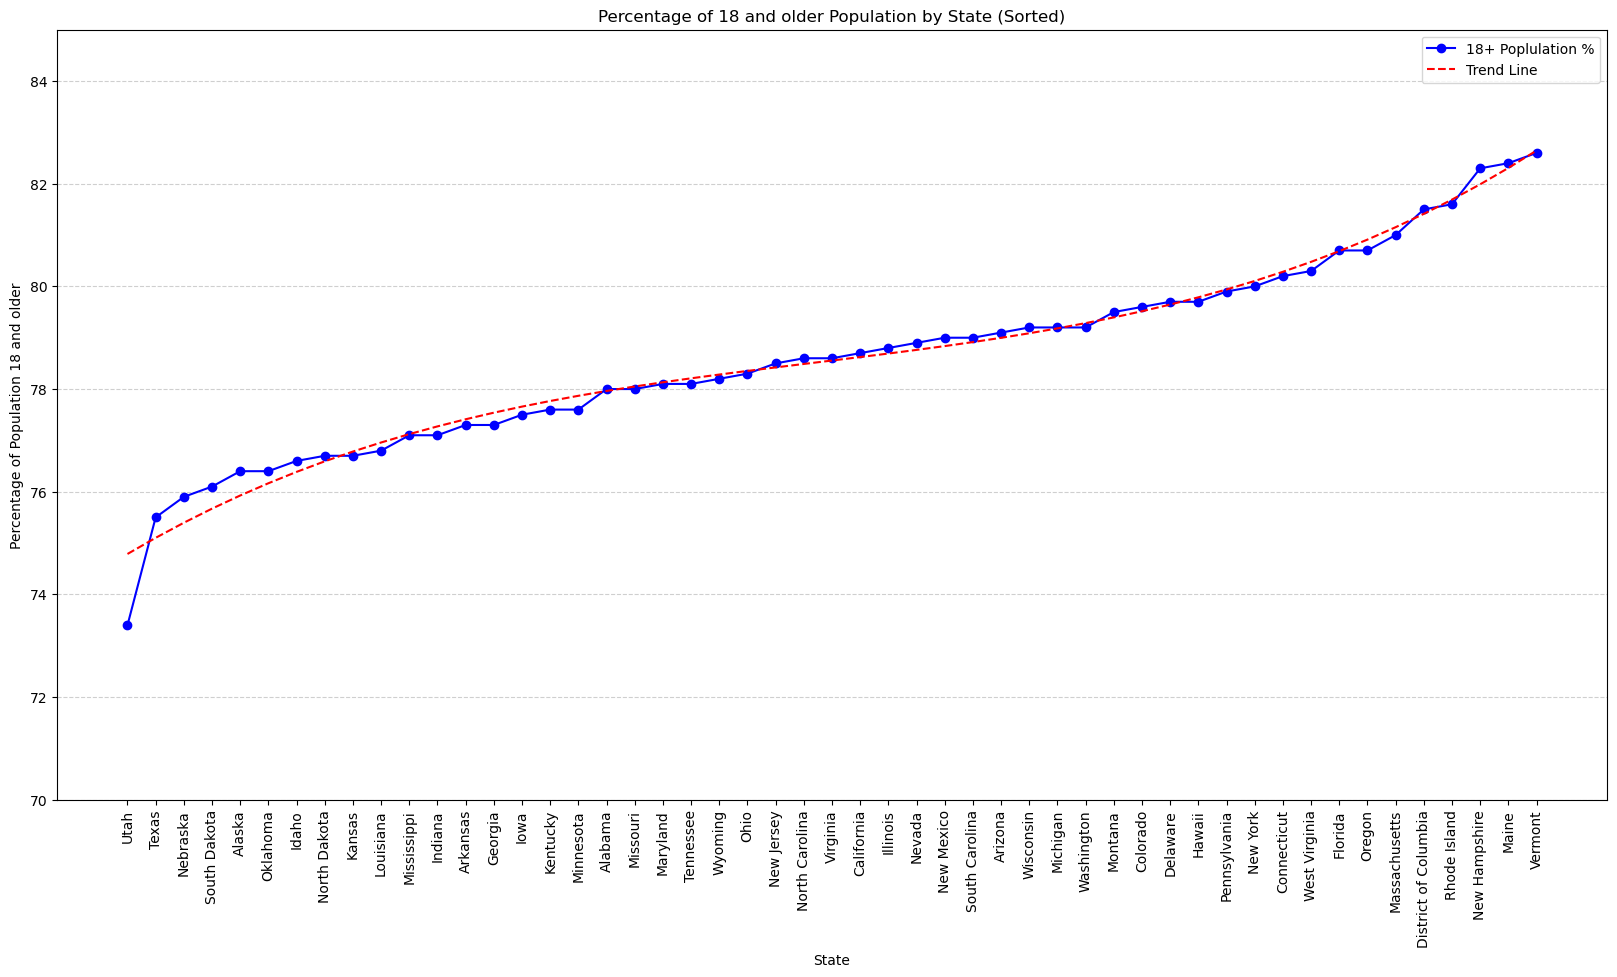

In [7]:
# Analysis of percentage population 18 years and older, continued...

# For polynomial curve plotting
import numpy as np

df['18+ Percentage'] = pd.to_numeric(df['Resident Population Age 18 Years and Older Percent'] )

# Sort states by percentage
df_sorted = df.sort_values(by='18+ Percentage')

plt.figure(figsize=(20, 10))

# X-axis: State names
x_labels = df_sorted['Geographic Area']

# Y-axis: 18+ Percentage
y_values = df_sorted['18+ Percentage']

# Create the line plot
plt.plot(
    x_labels,
    y_values,
    marker = 'o',
    linestyle = '-',
    color = 'blue',
    label = '18+ Poplulation %'
)

# Set the Y-axis limits.  Get the 'floor' and 'ceiling' values +/-5
y_min = (df_sorted['18+ Percentage'].min() // 5) * 5
y_max = -(-df_sorted['18+ Percentage'].max() // 5 ) * 5

plt.ylim(y_min, y_max)

# Rotate state names for readability
plt.xticks(rotation=90, fontsize=10)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Percentage of Population 18 and older')
plt.title('Percentage of 18 and older Population by State (Sorted)')
plt.legend()

# Smooth Curve (Polynomial Fit)
z = np.polyfit( range( len( y_values ) ), y_values, 3 )  # 3rd-degree polynomial fit
p = np.poly1d(z)
plt.plot(x_labels, p(range(len(y_values))), color='red', linestyle='dashed', label='Trend Line')

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add US 

plt.show()